In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import isclose
import statistics

# Import Data

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Let's get to know our data
We will see if there's any impractical data, and if so, clean them up. 

In [5]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
df.shape

(569, 33)

In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

## Cleaning up

In [8]:
df = df.drop(["Unnamed: 32"], axis=1)
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### No NULL data, which is great!

In [10]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [11]:
df['id'].is_unique

True

In [70]:
#change our index to the ID column
df.set_index("id")

,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
id,,,,,,,,,,,,,,,,,,,,,
862722,143.5,9.833,185.2,0.07568,0.010840,0.12020,0.000000,0.000000,0.00000,0.00000,...,7.930,0.11700,0.010190,0.15840,0.1930,0.02659,0.2932,13.43,1.5080,19.54
921362,170.4,11.730,223.6,0.11990,0.064570,0.30640,0.013640,0.013640,0.05000,0.09252,...,8.678,0.08668,0.015470,0.15960,0.2037,0.02105,0.2790,25.44,1.4790,31.89
921092,178.8,19.140,248.0,0.04878,0.009692,0.08340,0.000000,0.000000,0.00000,0.00000,...,9.077,0.08098,0.012660,0.12560,0.1870,0.02882,0.3058,25.49,1.4620,30.92
92751,181.0,19.150,268.6,0.04362,0.004660,0.06444,0.000000,0.000000,0.00000,0.00000,...,9.456,0.05263,0.007189,0.08996,0.1587,0.02676,0.2871,24.54,1.4280,30.37
85713702,201.9,8.205,242.2,0.05943,0.016460,0.13570,0.005917,0.005917,0.02564,0.01588,...,8.964,0.08600,0.008968,0.12970,0.1769,0.02574,0.3105,16.84,0.9567,21.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8611555,1878.0,120.000,2562.0,0.26650,0.056930,0.60760,0.184500,0.020300,0.28670,0.33390,...,30.000,0.10630,0.008166,0.15730,0.1829,0.01065,0.2355,24.91,1.4740,33.62
899987,2010.0,153.100,3234.0,0.23630,0.042430,0.59370,0.191300,0.015080,0.27560,0.33680,...,33.130,0.11490,0.006369,0.15300,0.1956,0.02335,0.3690,17.46,0.8509,23.58
873592,2250.0,128.700,3216.0,0.19140,0.025370,0.40340,0.187800,0.012410,0.26880,0.28710,...,33.120,0.10940,0.004631,0.14720,0.1800,0.01575,0.2856,21.87,1.4810,32.85


In [13]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Write a function to divide our dataset
We can classify the attributes in our dataset to 4: diagnosis, mean, standard error, and worst. "Worst" or largest mean value for mean of distances from center to points on the perimeter. 

Here, there is a written function to help us divide the dataset into smaller chunks, if we need to work with only "mean" attributes and so on.

In [71]:
def divide_df(dataframe, ending):
    d = pd.DataFrame()
    length = len(ending)
    for column in dataframe.columns:
        if ending in column[-length:]:
            d[column] = df[column]
    d["diagnosis"] = df["diagnosis"]
    return d

In [15]:
divide_df(df, "mean")

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,M
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,M


In [72]:
df_mean = divide_df(df, "mean").groupby("diagnosis").mean()
df_mean

,area_mean,compactness_mean,concave points_mean,concavity_mean,fractal_dimension_mean,perimeter_mean,radius_mean,smoothness_mean,symmetry_mean,texture_mean
diagnosis,,,,,,,,,,
B,462.790196,0.080085,0.025717,0.046058,0.062867,78.075406,12.146524,0.092478,0.174186,17.914762
M,978.376415,0.145188,0.087990,0.160775,0.062680,115.365377,17.462830,0.102898,0.192909,21.604906


# Let's see the distribution of compactness and radius mean by diagnosis.

In [18]:
radius = df.groupby("diagnosis").mean()["radius_mean"]
radius

diagnosis
B    12.146524
M    17.462830
Name: radius_mean, dtype: float64

In [19]:
compactness = df.groupby("diagnosis").mean()["compactness_mean"]
compactness

diagnosis
B    0.080085
M    0.145188
Name: compactness_mean, dtype: float64

<AxesSubplot:xlabel='diagnosis'>

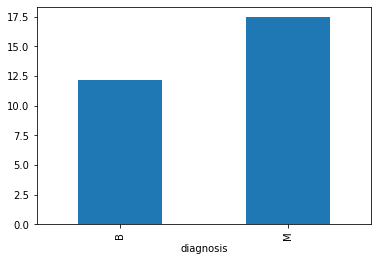

In [20]:
radius.plot.bar()

<AxesSubplot:xlabel='diagnosis'>

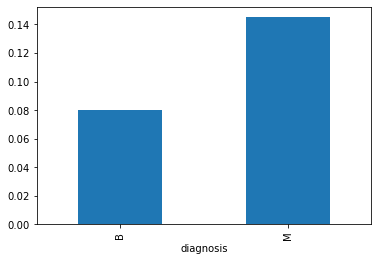

In [21]:
compactness.plot.bar()

# Are all variables > in Malignant than Benign? Let's check.

In [22]:
mean = df.groupby("diagnosis").mean().drop(["id"], axis=1)
mean

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [78]:
larger_benign = []
for column in mean.columns:
    if mean[column][1] > mean[column][0]:
        continue
    else:
        print(mean[column], "\n")
        larger_benign.append(column)

diagnosis
B    0.062867
M    0.062680
Name: fractal_dimension_mean, dtype: float64 

diagnosis
B    1.220380
M    1.210915
Name: texture_se, dtype: float64 

diagnosis
B    0.007196
M    0.006780
Name: smoothness_se, dtype: float64 

diagnosis
B    0.020584
M    0.020472
Name: symmetry_se, dtype: float64 



In [44]:
larger_benign

['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se']

# Values that are close to each other

In [55]:
close_list = []
for column in mean.columns:
    if math.isclose(mean[column][1], mean[column][0], rel_tol=0.09):
        print(mean[column], "\n")
        close_list.append(column)
    else:
        continue

diagnosis
B    0.062867
M    0.062680
Name: fractal_dimension_mean, dtype: float64 

diagnosis
B    1.220380
M    1.210915
Name: texture_se, dtype: float64 

diagnosis
B    0.007196
M    0.006780
Name: smoothness_se, dtype: float64 

diagnosis
B    0.020584
M    0.020472
Name: symmetry_se, dtype: float64 



In [73]:
close_list

['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se']

# Let's compare these values by their graphs.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fractal_dimension_mean', ylabel='diagnosis'>

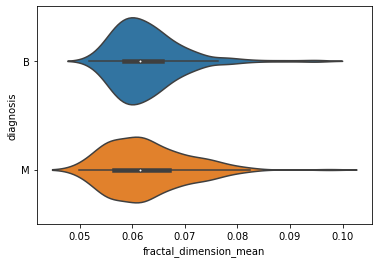

In [90]:
sns.violinplot(df["fractal_dimension_mean"], df["diagnosis"])

# Values that are farthest from each other

In [67]:
diff_dic = {}
for column in mean.columns:
    diff = abs(mean[column][1] - mean[column][0])
    diff_dic[column] = diff

diff_dic

{'radius_mean': 5.316306379155435,
 'texture_mean': 3.6901437556154555,
 'perimeter_mean': 37.289971196025576,
 'area_mean': 515.5862190159082,
 'smoothness_mean': 0.010420843507214214,
 'compactness_mean': 0.06510316117012843,
 'concavity_mean': 0.11471709597272872,
 'concave points_mean': 0.062272593837535015,
 'symmetry_mean': 0.018722967866391854,
 'fractal_dimension_mean': 0.00018730061836055856,
 'radius_se': 0.3250001942286348,
 'texture_se': 0.00946548940330838,
 'perimeter_se': 2.3236079567676122,
 'area_se': 51.537257200993594,
 'smoothness_se': 0.0004158076211616714,
 'compactness_se': 0.010842918595740186,
 'concavity_se': 0.015827273859732573,
 'concave points_se': 0.005202819037048782,
 'symmetry_se': 0.00011140577929284745,
 'fractal_dimension_se': 0.00042635439987315704,
 'radius_worst': 7.755010200306538,
 'texture_worst': 5.803137519158611,
 'perimeter_worst': 54.36439181332911,
 'area_worst': 863.3868809788066,
 'smoothness_worst': 0.01988574005073729,
 'compactness_

In [69]:
max(diff_dic)

'texture_worst'

# Let's see it in a graph

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='texture_worst', ylabel='diagnosis'>

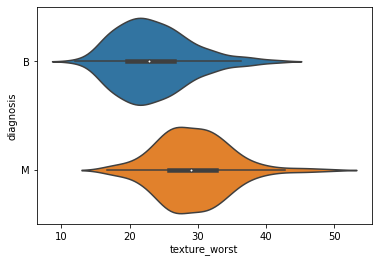

In [91]:
sns.violinplot(df["texture_worst"], df["diagnosis"])

# Standard deviation

In [98]:
std_dev = {}
for column in mean.columns:
    dev = statistics.stdev(mean[column])
    std_dev[column] = dev
std_dev 

{'radius_mean': 3.759196291566109,
 'texture_mean': 2.6093256731488825,
 'perimeter_mean': 26.367991502960717,
 'area_mean': 364.57451175248116,
 'smoothness_mean': 0.007368649109634975,
 'compactness_mean': 0.046034886740078544,
 'concavity_mean': 0.08111723648034445,
 'concave points_mean': 0.04403337338459662,
 'symmetry_mean': 0.013239137542263505,
 'fractal_dimension_mean': 0.0001324415373631845,
 'radius_se': 0.22980984122601272,
 'texture_se': 0.006693111744328763,
 'perimeter_se': 1.6430389430493968,
 'area_se': 36.4423440505778,
 'smoothness_se': 0.0002940203885924648,
 'compactness_se': 0.007667101266901603,
 'concavity_se': 0.011191572673913484,
 'concave points_se': 0.003678948622383657,
 'symmetry_se': 7.87757820013443e-05,
 'fractal_dimension_se': 0.00030147808733903026,
 'radius_worst': 5.483620300807599,
 'texture_worst': 4.103437891955132,
 'perimeter_worst': 38.44143010628744,
 'area_worst': 610.5067183276168,
 'smoothness_worst': 0.014061341638789256,
 'compactness_w

# Attribute with the max std. dev.

In [84]:
max(std_dev)

'texture_worst'

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='texture_worst', ylabel='diagnosis'>

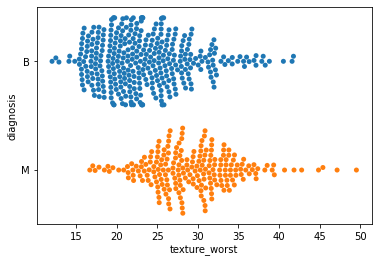

In [89]:
sns.swarmplot(df["texture_worst"], df["diagnosis"])

# Attribute with the min std. dev

In [85]:
min(std_dev)

'area_mean'

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 40.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='area_mean', ylabel='diagnosis'>

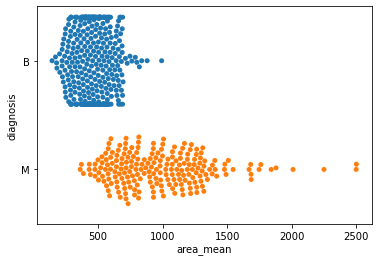

In [95]:
sns.swarmplot(df["area_mean"], df["diagnosis"])

# Corrolations in our dataset

In [28]:
divide_df(df, "mean").corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


<AxesSubplot:>

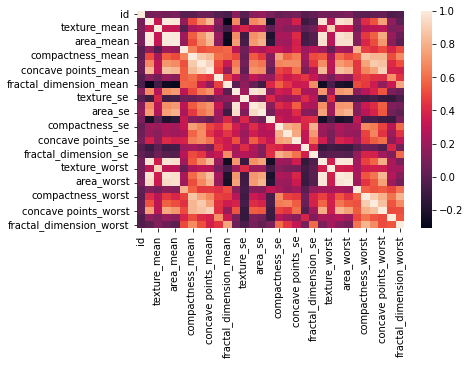

In [30]:
sns.heatmap(df.corr())

In [47]:
df.corr()

,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
area_mean,1.000000,0.800086,0.959213,0.498502,0.212583,0.390410,0.823269,0.372320,0.722017,0.685983,...,0.962746,0.177028,-0.166777,0.123523,0.151293,-0.072497,0.143570,0.321086,-0.066280,0.287489
area_se,0.800086,1.000000,0.811408,0.455653,0.284840,0.283257,0.690299,0.415730,0.538166,0.617427,...,0.757373,0.246552,0.075150,0.125389,0.223970,0.134109,0.074126,0.259845,0.111567,0.196497
area_worst,0.959213,0.811408,1.000000,0.509604,0.199371,0.438296,0.809630,0.342271,0.747419,0.675987,...,0.984015,0.206718,-0.182195,0.209145,0.177193,-0.110343,0.209146,0.343546,-0.083195,0.345842
compactness_mean,0.498502,0.455653,0.509604,1.000000,0.738722,0.865809,0.831135,0.642262,0.815573,0.883121,...,0.535315,0.659123,0.135299,0.565541,0.602641,0.229977,0.510223,0.236702,0.046205,0.248133
compactness_se,0.212583,0.284840,0.199371,0.738722,1.000000,0.678780,0.490424,0.744083,0.483208,0.670279,...,0.204607,0.318943,0.336696,0.227394,0.421659,0.394713,0.277878,0.191975,0.231700,0.143003
compactness_worst,0.390410,0.283257,0.438296,0.865809,0.678780,1.000000,0.667454,0.452888,0.801080,0.754968,...,0.475820,0.472468,-0.055558,0.568187,0.473200,0.060255,0.614441,0.277830,-0.092439,0.360832
concave points_mean,0.823269,0.690299,0.809630,0.831135,0.490424,0.667454,1.000000,0.615634,0.910155,0.921391,...,0.830318,0.553695,0.027653,0.452753,0.462497,0.095351,0.375744,0.293464,0.021480,0.292752
concave points_se,0.372320,0.415730,0.342271,0.642262,0.744083,0.452888,0.615634,1.000000,0.602450,0.683260,...,0.358127,0.380676,0.328429,0.215351,0.393298,0.312780,0.143116,0.163851,0.230283,0.086741
concave points_worst,0.722017,0.538166,0.747419,0.815573,0.483208,0.801080,0.910155,0.602450,1.000000,0.861323,...,0.787424,0.503053,-0.102007,0.547691,0.430297,-0.030413,0.502528,0.295316,-0.119638,0.359755
concavity_mean,0.685983,0.617427,0.675987,0.883121,0.670279,0.754968,0.921391,0.683260,0.861323,1.000000,...,0.688236,0.521984,0.098564,0.448822,0.500667,0.178009,0.409464,0.302418,0.076218,0.299879


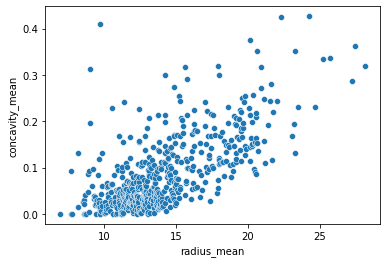

In [93]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x=df["radius_mean"], y=df["concavity_mean"], ax=ax)

plt.show()